<ipython-input-3-4cab102c398e>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(city_lst, rotation=45, ha='right', fontsize=8)
<ipython-input-3-4cab102c398e>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(city_lst, rotation=45, ha='right', fontsize=8)
<ipython-input-3-4cab102c398e>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(city_lst, rotation=45, ha='right', fontsize=8)
<ipython-input-3-4cab102c398e>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(city_lst, rotation=45, ha='right', fontsize=8)
<ipython-input-3-4cab102c398e>:32: UserWarning: set_ticklabels() should only

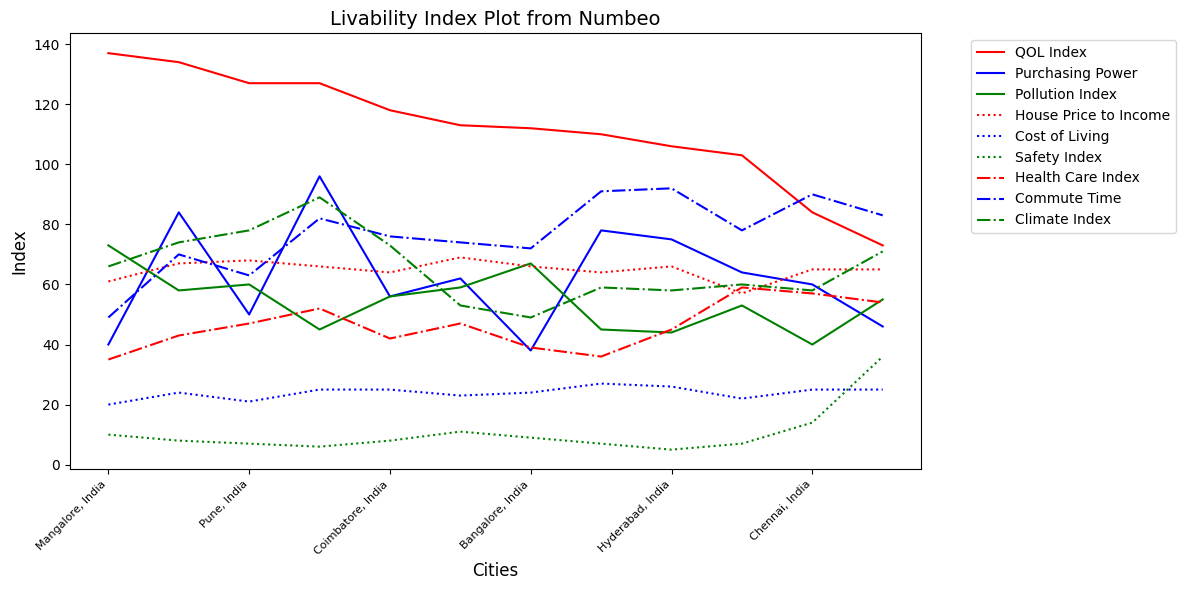

In [3]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import math
import re
from matplotlib.ticker import MaxNLocator

label_lst = ["QOL Index", "Purchasing Power", "Pollution Index", "House Price to Income",
             "Cost of Living", "Safety Index", "Health Care Index", "Commute Time", "Climate Index"]

def plotParam(index_code=1, color="red", linestyle="-", toplist="full", india_only="no"):
    city_lst = []
    index_lst = []
    data_range = len(data)

    if toplist == "full":
        data_range = len(data)
    elif toplist == "top100":
        data_range = 99
    elif toplist == "top10":
        data_range = 10

    for i in range(data_range):
        if (data[i][0].find("India") < 0 or data[i][0].find("Indianapolis") >= 0) and india_only == "yes":
            continue
        city_lst.append(data[i][0])
        index_lst.append(math.floor(float(data[i][index_code])))

    ax.plot(city_lst, index_lst, color=color, label=label_lst[index_code - 1], linestyle=linestyle)

    if len(city_lst) >= 10:
        ax.set_xticklabels(city_lst, rotation=45, ha='right', fontsize=8)
    elif len(city_lst) >= 100:
        ax.set_xticklabels(city_lst, rotation=90, ha='right', fontsize=5)


url = 'https://www.numbeo.com/quality-of-life/rankings.jsp?title=2023'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', id="t2")
data = []

for row in table.find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all('td')]
    if row_data:  # Check if the row has data (not header row)
        row_data = [item for item in row_data if item]  # Remove empty items
        data.append(row_data)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data for each index with different styles
plotParam(1, 'red', '-', india_only="yes")
plotParam(2, 'blue', '-', india_only="yes")
plotParam(3, 'green', '-', india_only="yes")
plotParam(4, 'red', 'dotted', india_only="yes")
plotParam(5, 'blue', 'dotted', india_only="yes")
plotParam(6, 'green', 'dotted', india_only="yes")
plotParam(7, 'red', 'dashdot', india_only="yes")
plotParam(8, 'blue', 'dashdot', india_only="yes")
plotParam(9, 'green', 'dashdot', india_only="yes")

# Set axis labels and title
ax.set_xlabel('Cities', fontsize=12)
ax.set_ylabel('Index', fontsize=12)
ax.set_title('Livability Index Plot from Numbeo', fontsize=14)

# Reduce number of x-tick labels for better spacing
ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=10))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Move the legend to the top-right corner
ax.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1.05, 1))

# Display the plot
plt.tight_layout()
plt.show()
